## Introduction 


In any company exists an embedded desire to predict its future revenue and future sales.

The basic recipe is: 


___Collect historical data related to previous sales and use it to predict expected sales.___


<span style="color: red"> Add Image From Medium </span>


The revolution that took over the world over the last 10 years saw the rise of Deep Learning as the driving force behind all imaginable machine learning benchmarks: computer vision, language and so many others. Recently, one could argue that Deep Learning has restructured the potential future of sales forecasting by allowing models to encode for multiple time series in a single model as well as account for categorical variables. My goal today is: 



__To walk you through the basic intuitions behind the main concepts and models for sales forecasting from a time-series perspective and discuss what kind of capabilities recent Deep Learning models could bring to the table.__




### Reading Suggestions



In case you feel like you need to brush up on the basics of sales forecasting and time-series, I recommend these 3 reads:


- [Harvard business article](https://hbr.org/1971/07/how-to-choose-the-right-forecasting-technique) on the fundamentals of sales forecasting. 
- [TDS article by ](https://towardsdatascience.com/the-complete-guide-to-time-series-analysis-and-forecasting-70d476bfe775)  @Marco Peixeiro from on @Towards Data Science (really comprehensive and instructive).

- ["Time Series Forecasting Principles with Amazon Forecast"](https://d1.awsstatic.com/whitepapers/time-series-forecasting-principles-amazon-forecast.pdf). They do a thorough job of explaining how Sales Forecasting works, as well as what are the challenges and problems one might encounter in the field. 






### The Sales Forecasting Problem


Sales forecasting is all about using historical data to inform decision making.

A simple forecasting cycle looks like this:


<p>
    <img src="images\forecasting_cycle.png"; alt="Forecasting cycle">
    
</p>

<p>
    <em>Image by the author</em>
    
    
</p>







On its core, this is a [time series](https://en.wikipedia.org/wiki/Time_series#:~:text=A%20time%20series%20is%20a,sequence%20of%20discrete%2Dtime%20data.) problem: given some data in time, we want to predict the dynamics of that same data in the future. To do this, we require some trainable model of these dynamics. 


According to [Amazon's time series forecasting principles](https://d1.awsstatic.com/whitepapers/time-series-forecasting-principles-amazon-forecast.pdf), forecasting is a hard problem for 2 reasons:

- Incorporating large volumes of historical data, which can lead to missing important information about the past of the target data dynamics.

- Incorporating related yet independent data (holidays/events, locations, marketing promotions)

Besides these, one the central aspects of sales forecasting is that accuracy is key:


- If forecast is too high it may lead to over-investing and therefore loosing money.
- If forecast is too low it may lead to under-investing and therefore loosing opportunity.



Incorporating exogenous factors like the weather, time and spatial location could be beneficial for a prediction. In this [medium piece](https://medium.com/swlh/how-to-apply-machine-learning-in-demand-forecasting-for-retail-b781957e5919) by @Liudmyla Taranenko, she mentions a great example discussing how on-demand ride services like UBER, Lyft or Didi Chuxing must take into account factors like weather conditions (like humidity and temperature), time of the day or day of the week to do its demand forecasting. Therefore, good forecasting models should have mechanisms that enable them to account for such factors.




In sum, so what do we know so far? 

- We know that forecasting is a hard problem where accuracy really matters.
- We know that there are exogenous factors that come into play that are hard to account for.

What we don't know yet is:
- What are the traditional forecasting methods and why they might succumb to these challenges.
- How is it that deep learning methods could help, and what are some of the prospects to replace traditional models.





### Types of Forecasting Models

According to this [article](https://hbr.org/1971/07/how-to-choose-the-right-forecasting-technique) featured in the harvard business review, there are three types of Forecasting techniques:



- __Qualitative techniques__: usually involve expert opinion or information about special events.


- __Time series analysis and projection__: involve historical data,finding structure in the dynamics of the data like cyclical patterns, trends and growth rates.


    
- __Causal models__: these models involve the relevant causal relationships that may include pipeline considerations like inventories or market survey information. They can incorporate the results of a time series analysis.


We will focus on the time series analysis approach which has been the driving force behind traditional forecasting methods and, it can give a comprehensive layout of the forecasting landscape.


### Time Series Approach


Time series is a sequence of data points taken at successive, equally-spaced points in time that can be used to predict the future. 
A Time Series analysis model involves using historical data to forecast the future. It looks in the dataset for features such as trends, cyclical fluctuations, seasonality, and behavioral patterns.



The three key general ideas that are fundamental to consider, when dealing with a sales forecasting problem tackled from a time series perspective, are:


- Repeating patterns 
- Static patterns 
- Trends 

Now we'll look into each of these factors and write code that will allow us to understand them intuitively. After that, we will see what modern deep learning models could bring to the table. 


#### Repeating Patterns

When looking at a time series data, one element that we are looking for is a pattern that repeats in time. One key concept related to this idea is [__autocorrelation__](https://en.wikipedia.org/wiki/Autocorrelation#:~:text=Autocorrelation%2C%20also%20known%20as%20serial,the%20time%20lag%20between%20them.). 


Intuitively, ___autocorrelation corresponds to the similarity between observations as a function of the time lag between them.___

What does that mean? It refers to the idea of finding structure on the dynamics of the observations in a time-series by looking at the correlation between observations with themselves (i.e. "auto") at different time points. It is one of the main tools for finding repeating patterns.



To clarify this, let's take a look at the publicly available [weather dataset from kaggle](https://www.kaggle.com/muthuj7/weather-dataset) and plot both its raw temperature data as well as an autocorrelation plot.


The steps will be:
- Load our dataset
- Clean the dates column
- Plot raw weather data
- Plot an autocorrelation plot using ```statsmodels```


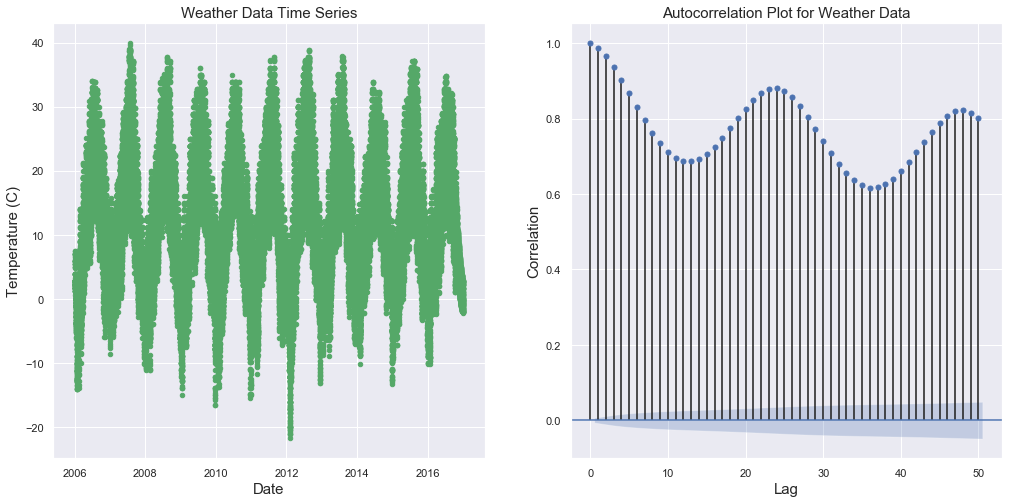

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from statsmodels.graphics.tsaplots import plot_acf

green = sns.color_palette("deep", 8)[2]
blue = sns.color_palette("deep", 8)[0]

# Loading the dataset
df_weather = pd.read_csv("data/weatherHistory.csv")

#Cleaning the dates column
df_weather['Formatted Date'] = pd.to_datetime(df_weather['Formatted Date'])


#Plotting the raw weather data
fig = plt.figure(figsize=(17,8))
ax1 = fig.add_subplot(121)

plt.scatter(df_weather["Formatted Date"],df_weather["Temperature (C)"], color=green,s=20)
plt.title("Weather Data Time Series",fontsize=15)
plt.xlabel("Date",fontsize=15)
plt.ylabel("Temperature (ºC)",fontsize=15)



# Plotting the autocorrelation plot

ax2 = fig.add_subplot(122)
plot_acf(df_weather["Temperature (C)"], ax=ax2,color=blue)
plt.title("Autocorrelation Plot for Weather Data", fontsize=15)
plt.ylabel("Correlation",fontsize=15)
plt.xlabel("Lag",fontsize=15)
plt.show()

We can clearly see a repeating pattern on the left which seems to have a sinusoidal shape. On the right, we can visualize the autocorrelation plot. The size of the lines indicate the amount of correlation for that given lag value. The graph seems to indicate a cyclical pattern of correlation which makes sense when we consider the seasonal and repetitive nature of the weather. 


However, what could we expect from an autocorrelation plot for a sales dataset? 
Would it present the same clear repeating pattern as this simple weather dataset? 

Let's plot the same information as above but with this [retail sales dataset](https://www.kaggle.com/manjeetsingh/retaildataset).




<!-- https://fred.stlouisfed.org/series/RSXFS -->

The steps here will be:
- Load the dataset
- Get the total volume of sales for 45 stores
- Plot the total volume of sales between 2010 and 2013

    

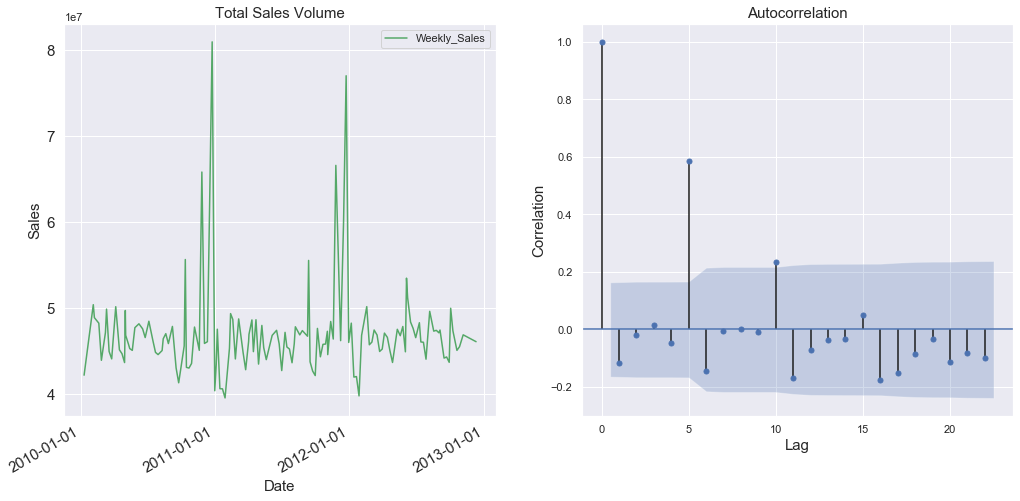

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.dates as mdates
green = sns.color_palette("deep",8)[2]
blue = sns.color_palette("deep",8)[0]
import datetime

retail_sales = 'C:/Users/lucas/Desktop/projects/medium_posts/sales_forecasting/data/sales_dataset.csv'

df_sales  = pd.read_csv(retail_sales)


fig = plt.figure(figsize=(17,8))



ax1 = fig.add_subplot(121)
df_sales_sum = df_sales.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()
df_sales_sum["Date"] = pd.to_datetime(df_sales_sum["Date"])
df_sales_sum.plot(x="Date",y="Weekly_Sales",color="g",ax=ax1, fontsize=15)
plt.xlabel("Date",fontsize=15)


plt.title("Total Sales Volume", fontsize=15)
plt.ylabel("Sales", fontsize=15)


date_form = mdates.DateFormatter("%Y-%m-%d")
year_locator = mdates.YearLocator()
ax1.xaxis.set_major_locator(year_locator)
ax2 = fig.add_subplot(122)

plot_acf(df_sales_sum.Weekly_Sales,ax=ax2)
plt.title("Autocorrelation", fontsize=15)

plt.xlabel("Lag",fontsize=15)
plt.ylabel("Correlation", fontsize=15)
plt.show()


Here we see one point of relatively high correlation on an observation at ```lag = 5```. The lack of the same structure we saw in the previous graph is a result of the contingencies of sales: given the amount of factors that go into predicting sales, we should not expect the data to have perfectly clear correlations as in the weather dataset. However it's interesting to observe spikes of correlation that could be associated with factors that relate to the type of product involved. For example, for a store that sells christmas gifts, we should expect to see high correlation between the observations separated one year apart starting from christmas, because people are expected to buy more gifts during this particular period.





#### Static patterns

As the expression suggests, the concept of a static pattern relates to the idea of something that does not change. 

In Time Series, the most famous proxy for this concept is [__stationarity__](https://en.wikipedia.org/wiki/Stationary_process), which refers to the statistical properties of a time series that remain static: the observations in a stationary time series are not dependent on time.



___Time series are stationary if they do not have trend or seasonal effects.___ 

The trend and seasonality will affect the value of the time series at different times. Traditionally, we would be looking for consistency over time, for example by using the mean or the variance of the observations. When a time series is stationary, it can be easier to model and statistical modeling methods usually assume or require the time series to be stationary to be effective. 



If you want to dig deeper into stationarity I recommend this [piece](https://towardsdatascience.com/stationarity-in-time-series-analysis-90c94f27322#:~:text=In%20the%20most%20intuitive%20sense,not%20itself%20change%20over%20time.) by @Shay Palachy.


The standard procedure to check if a dataset is stationary involves using a test called the [Dickey-Fuller]((https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test)) test, which checks for the confidence of whether or not the data has static statistical properties. To go into more detail check this [article](https://towardsdatascience.com/the-complete-guide-to-time-series-analysis-and-forecasting-70d476bfe775).



In [4]:
from statsmodels.tsa.stattools import adfuller

adf_test_sales = adfuller(list(df_sales_sum["Weekly_Sales"]))

adf_test_weather = adfuller(list(df_weather["Temperature (C)"]))

print("Weather Results:")
print("ADF = " + str(adf_test_weather[0]))
print("p-value = " +str(adf_test_weather[1]))

print("Retail sales results:")

print("ADF = " + str(adf_test_sales[0]))

print("p-value = " +str(adf_test_sales[1]))

Weather Results:
ADF = -10.140083406906376
p-value = 8.46571984130497e-18
Retail sales results:
ADF = -2.6558148827720887
p-value = 0.08200123056783876


Here, we can see that the result of the test for the weather dataset is pointing to stationary, which is a result we should take with a grain of salt because it depends heavily on how we sample our data, usually climate data is cyclo-stationary. On our retail sales dataset however, the p-vale, indicating a non-significant confidence that the data would be stationary.


#### Trends

A trend represents a tendency identified in our data. In a stock market scenario, this could be the trend of a given stock that appears to be going up or down. For Sales Forecasting, this is key: ___identifying a trend allows us to know the direction that our time-series is heading, which is fundamental for predicting the future of sales.___


We will use the [```fbprophet```](https://facebook.github.io/prophet/docs/quick_start.html) package to identify the overall trends for both our datasets. The steps will be:


- Select a range for the weather data (between 2007 and 2009)
- Feed the data to the ```fbprophet.Prophet``` object as a dataframe with two columns: "ds" (for date) and "y" (data) 

- Run the model
- Plot the trend with an upper and lower bound


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
C:\Users\lucas\.conda\envs\env_1\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



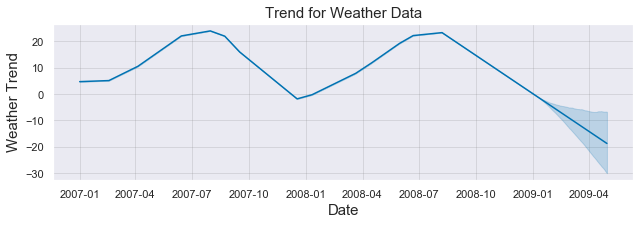

In [7]:
from fbprophet import Prophet
from datetime import datetime

start_date = "2007-01-01"
end_date = "2008-12-31"
df_weather["Formatted Date"] = pd.to_datetime(df_weather["Formatted Date"], utc=True)

date_range = (df_weather["Formatted Date"] > start_date) & (df_weather["Formatted Date"] < end_date)

df_prophet = df_weather.loc[date_range]

m = Prophet()


ds = df_prophet["Formatted Date"].dt.tz_localize(None)
y = df_prophet["Temperature (C)"]
df_for_prophet = pd.DataFrame(dict(ds=ds,y=y))
m.fit(df_for_prophet)

future = m.make_future_dataframe(periods=120)


forecast = m.predict(future)
forecast = forecast[["ds","trend", "trend_lower", "trend_upper"]]
fig = m.plot_components(forecast,plot_cap=False)
trend_ax = fig.axes[0]


trend_ax.plot()
plt.title("Trend for Weather Data", fontsize=15)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Weather Trend", fontsize=15)
plt.show()

We can see that for the weather, the trend follows the regular seasons as we would expect, going up during the summer and down during the winter.


Now, let's do the same for the retail dataset. The steps will be similar to the ones for the above plot, with the only difference being that here we will select one store from the retail dataset.



C:\Users\lucas\.conda\envs\env_1\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\lucas\.conda\envs\env_1\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



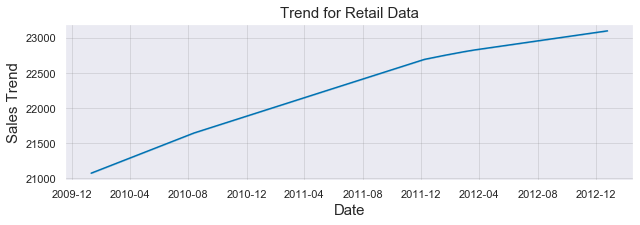

In [15]:
from fbprophet import Prophet


m = Prophet()
# Selecting one store
df_store_1 = df_sales[df_sales["Store"]==1]

df_store_1["Date"] = pd.to_datetime(df_store_1["Date"])
ds = df_store_1["Date"].dt.tz_localize(None)
y = df_store_1["Weekly_Sales"]
df_for_prophet = pd.DataFrame(dict(ds=ds,y=y))
m.fit(df_for_prophet)
future = m.make_future_dataframe(periods=15)
forecast = m.predict(future)
forecast = forecast[["ds","trend", "trend_lower", "trend_upper"]]
fig = m.plot_components(forecast,plot_cap=False)
trend_ax = fig.axes[0]
trend_ax.plot()
plt.title("Trend for Retail Data", fontsize=15)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Sales Trend", fontsize=15)

plt.show()

The sales performance of the selected store shows an almost perfectly linear upward trend from 2010 to 2013 for one of the stores in our dataset, with the stores having an increase of total volume sales of over 1%. The practical interpretation of these results require other metrics like churn, and potential increase in costs, so an upward trend does not necessarily mean that the profits increased. However, the trend is a good indicator of overall performance, once all the factors are considered.


### Traditional Time Series Models to Sales Forecasting




So far, we covered the basics of the sales forecasting problem and identified the main components of it from a time series perspective: repeating patterns, static patterns and the idea of a trend. If you want to dig deeper on time series, I recommend this [article](https://towardsdatascience.com/time-series-analysis-in-python-an-introduction-70d5a5b1d52a) by @Will Koehrsen.




Now we will look into the traditional time series approaches to deal with sales forecasting problems:




- Moving Average
- Exponential smoothing

- ARIMA

#### Moving Average
This model assumes that the next observation is the mean of all past observations and it can be used to identify interesting trends in the data. We can define a window to apply the moving average model to smooth the time series, and highlight different trends. 


Let's use the moving average model to predict the weather and sales. The steps will be:



- Select a range 
- Define a value for our moving average window
- Calculate the mean absolute error
- Plot an upper and lower bound for the rolling mean
- Plot the real data


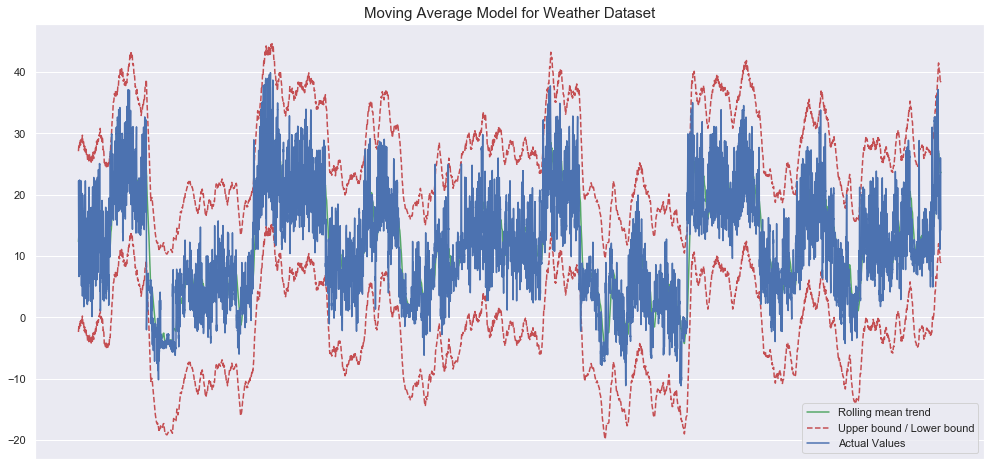

In [6]:
from sklearn.metrics import mean_absolute_error

green = sns.color_palette("deep", 8)[2]
blue = sns.color_palette("deep", 8)[0]

start_date = "2007-01-01"
end_date = "2008-12-31"
df_weather["Formatted Date"] = pd.to_datetime(df_weather["Formatted Date"], utc=True)
date_range = (df_weather["Formatted Date"] > start_date) & (df_weather["Formatted Date"] < end_date)
df_weather_ma = df_weather.loc[date_range]
series = df_weather_ma["Temperature (C)"]

window=90
rolling_mean = series.rolling(window=window).mean()
fig,ax = plt.subplots(figsize=(17,8))

plt.title('Moving Average Model for Weather Dataset',fontsize=15)
plt.plot(rolling_mean, color=green, label='Rolling mean trend')
#Plot confidence intervals for smoothed values
mae = mean_absolute_error(series[window:], rolling_mean[window:])
deviation = np.std(series[window:] - rolling_mean[window:])
lower_bound = rolling_mean - (mae + 2 * deviation)
upper_bound = rolling_mean + (mae + 2 * deviation)
plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
plt.plot(lower_bound, 'r--')
plt.plot(series[window:],color=blue, label="Actual Values")

plt.legend(loc='best')
plt.grid(True)
plt.xticks([])

plt.show()

The model seems to capture some of the dynamics of the weather. Let's see how the model does with the retail dataset.


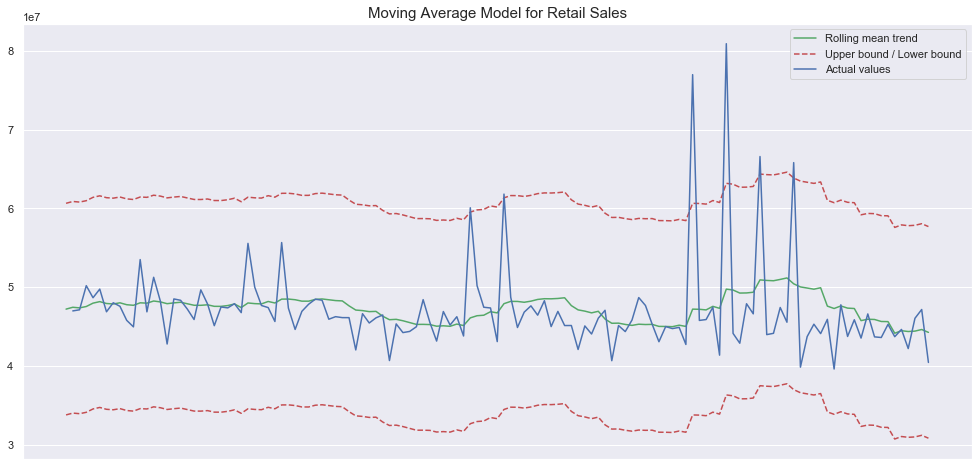

In [7]:
series = df_sales_sum.Weekly_Sales
window=15

rolling_mean = series.rolling(window=window).mean()
fig,ax = plt.subplots(figsize=(17,8))


plt.title('Moving Average Model for Retail Sales',fontsize=15)

plt.plot(rolling_mean, color=green, label='Rolling mean trend')

#Plot confidence intervals for smoothed values
mae = mean_absolute_error(series[window:], rolling_mean[window:])
deviation = np.std(series[window:] - rolling_mean[window:])
lower_bound = rolling_mean - (mae + 1.92 * deviation)
upper_bound = rolling_mean + (mae + 1.92 * deviation)

plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
plt.plot(lower_bound, 'r--')

plt.plot(series[window:], color=blue,label='Actual values')


plt.legend(loc='best')
plt.grid(True)
plt.xticks([])
plt.show()

For the sales dataset, the fit does not look so promising, but the retail dataset also has much less data in comparison to the weather dataset. Additionally, the window parameter that sets the size of our averaging has a big effect on our overall performance and I did not do any additional hyper-parameter tunning. Here, what we should take away is that complex sales datasets will require more information than what a simple unidimensional time-series can provide.


#### Exponential Smoothing

Exponential smoothing is similar to moving average, but in this case a decreasing weight is assigned to each observation, so less importance is given to observations as we move further from the present. Such an assumption can be good and bad: it can be beneficial to decrease the weight of outdates information within the time-series dynamics, but it can be harmful when past information has some kind of permanent causal relationship with the dynamics of the data.  




Let's use exponential smoothing in the weather dataset used above, we will:
- Fit the data 
- Forecast 

- Plot the prediction agains the real values


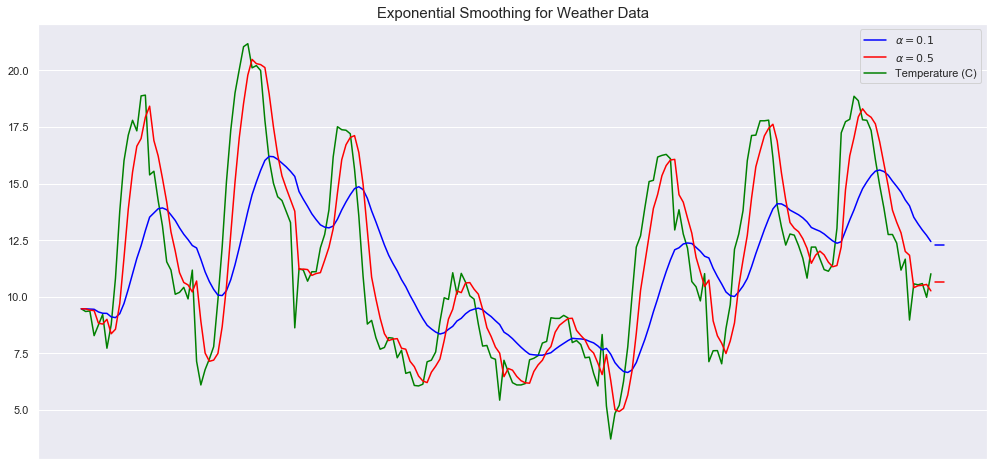

In [8]:
from statsmodels.tsa.api import ExponentialSmoothing
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
sns.set()
import pandas as pd

fit1 = ExponentialSmoothing(df_weather["Temperature (C)"][0:200]).fit(smoothing_level=0.1, optimized=False)
fit2 = ExponentialSmoothing(df_weather["Temperature (C)"][0:200]).fit(smoothing_level=0.5, optimized=False)
forecast1 = fit1.forecast(3).rename(r'$\alpha=0.1$')
forecast2 = fit2.forecast(3).rename(r'$\alpha=0.5$')
plt.figure(figsize=(17,8))

forecast1.plot(color='blue', legend=True)
forecast2.plot(color='red', legend=True)
df_weather["Temperature (ºC)"][0:200].plot(marker='',color='green', legend=True)
fit1.fittedvalues.plot(color='blue')
fit2.fittedvalues.plot(color='red')
plt.title("Exponential Smoothing for Weather Data", fontsize=15)
plt.xticks([])

plt.show()

Now for the retail dataset:

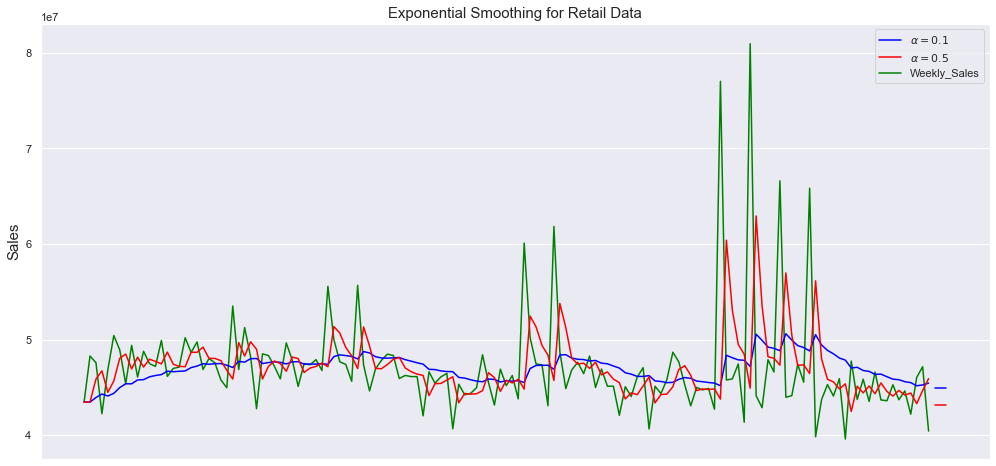

In [17]:
# Put the correct dataframe here!

fit1 = ExponentialSmoothing(df_sales_sum["Weekly_Sales"][0:200]).fit(smoothing_level=0.1, optimized=False)

fit2 = ExponentialSmoothing(df_sales_sum["Weekly_Sales"][0:200]).fit(smoothing_level=0.5, optimized=False)

forecast1 = fit1.forecast(3).rename(r'$\alpha=0.1$')
forecast2 = fit2.forecast(3).rename(r'$\alpha=0.5$')
plt.figure(figsize=(17,8))

forecast1.plot(color='blue', legend=True)
forecast2.plot(color='red', legend=True)
df_sales_sum["Weekly_Sales"][0:200].plot(marker='',color='green', legend=True)
plt.ylabel("Sales", fontsize=15)

fit1.fittedvalues.plot(color='blue')
fit2.fittedvalues.plot(color='red')

plt.title("Exponential Smoothing for Retail Data", fontsize=15)
plt.xticks([], minor=True)
plt.show()

Here we are smoothing with two values for the smoothing factor (the weight of the most recent period) $\alpha = 0.1$ and $\alpha = 0.5$, and plotting the real temperature and retail data in green. 


As we can see here, the smaller the smoothing factor, the smoother the time series will be. This  makes intuitive sense, 
because  as the smoothing factor approaches 0, we approach the moving average model because we are giving less and less special weight to the most recent period. The first one seems to capture well the dynamics on both datasets yet it seems to fail to capture the magnitude of certain peak activities.



Conceptually, it is interesting to reflect on how an assumption of a model can shape its performance given the nature of a dataset. I can be expected that new information is more important for sales because the factors that affect the likelihood of a store selling a product are probably changing and being updated constantly. Therefore, a model that has the capability of decreasing the importance of past information would capture this shifting dynamics more accurately when compared to one that assumes the dynamics are kept somehow constant.



#### Arima
ARIMA or Auto-regressive Integrated Moving Average is a time series model that aims to describe the auto-correlations in the time series data. It works well for short-term predictions and it can be useful to provide forecasted values for user-specified periods showing good results for demand, sales, planning, and production.

[source](https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/)    


The parameters of the ARIMA model are defined as follows:

- p: The number of lag observations included in the model
- d: The number of times that the raw observations are differenced
- q: The size of the moving average window


Now I am going to use ARIMA model to model the weather data and retail sales. The steps will be:
- Split the data into training and testing
- Fit the data
- Print the mean square error (our evaluation metric)
- Plot the model fit with the real values


MSE error: 3.105596078192541


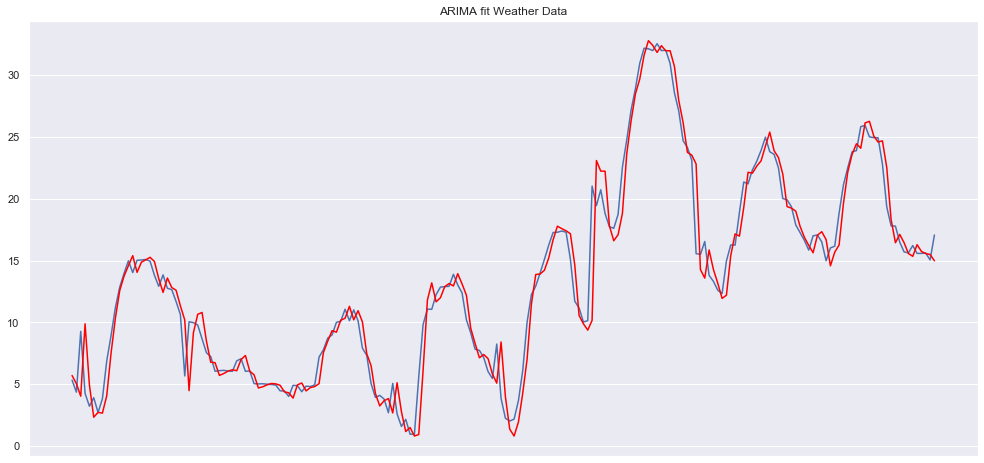

In [10]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import pandas as pd

X = df_weather["Temperature (C)"].values

train_size = 600
test_size = 200

train, test = X[0:train_size], X[train_size:train_size+test_size]

history = [x for x in train]
predictions = []
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)

mse = mean_squared_error(test, predictions)
print(f"MSE error: {mse}")
plt.figure(figsize=(17,8))

plt.plot(test)
plt.plot(predictions, color='red')
plt.title("ARIMA fit Weather Data")
plt.xticks([])
plt.show()

Here, we see an expected good fit of the ARIMA model to the Weather dataset given that before we saw that this dataset had really high autocorrelation. Let's compare this with how the model behaves with the sales dataset:



MSE error: 47664398980324.34


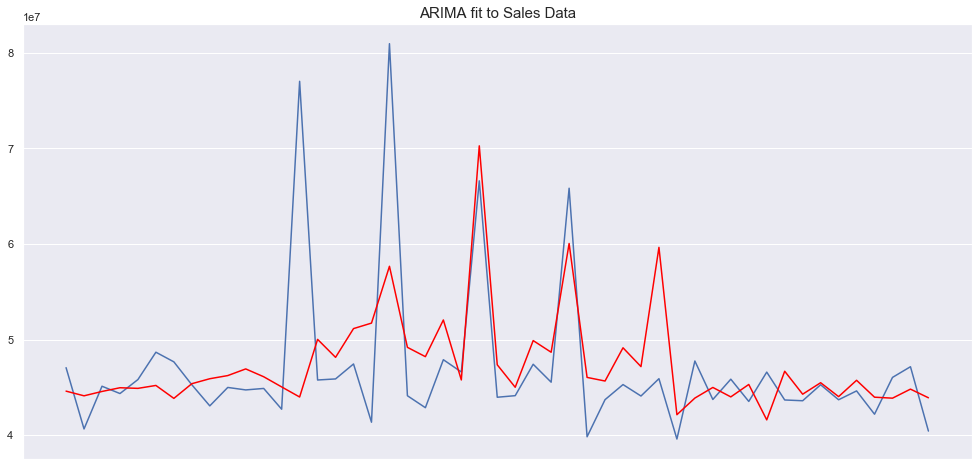

In [11]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()



X = df_sales_sum["Weekly_Sales"].values

split = int(0.66*len(X))
train, test = X[0:split], X[split:]

history = [x for x in train]
predictions = []
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
    
	obs = test[t]
	history.append(obs)
mse = mean_squared_error(test, predictions)

print(f"MSE error: {mse}")

plt.figure(figsize=(17,8))
plt.plot(test)
plt.plot(predictions, color='red')
plt.title("ARIMA fit to Sales Data",fontsize=15)
plt.xticks([])
plt.show()

Here, the fit is not nearly as good as it was in the weather dataset which is to be expected given that the ARIMA model usually works well for datasets that are highly auto-correlated. 


Let's just remember that the results here are merely to showcase the models and do not represent an accurate estimate. The datasets are limited (the retail sales dataset after summing is smaller than 200 data points) and I did not perform any complex hyperparameter tunning. The goal here was just to demonstrate how these models work and how they can be implemented in python. We can verify that the retail dataset seems to present challenges that the traditional models fail to overcome.


We can see that, for datasets that have a clear pattern, traditional models work well. However, in the absence of such a structure, these models don't seem to present the flexibility to adapt because they rely on strong assumptions regarding the dynamics of the target time-series.



Now, we will discuss the current deep learning approaches to sales forecasting and try to understand what they could bring to the table that would be beneficial for forecasting accuracy in situations where traditional models are not enough. 



### Modern Sales Forecasting, a deep learning forecasting revolution?

Here I want to outline the main candidates of what I believe to be the most suitable deep learning candidates for sales forecasting.



#### [Amazon's DeepAR model](https://docs.aws.amazon.com/forecast/latest/dg/aws-forecast-recipe-deeparplus.html)

The models we discussed here today fit a single model to each individual time series. However, in sales, there are often multiple time series that relate to the dynamics you are trying to model. For this reason, it is extremely beneficial to be able to jointly train a model over all the relevant time series. 


Enters Amazon Forecast DeepAR+, a supervised learning algorithm that uses recurrent neural networks to forecast one-dimensional time series. It allows for training multiple time series features on one model and it outperforms the traditional models on the standard time series benchmarks. 


The main point about this model is that it overcomes one of the limitations of traditional models that can only be trained on single time series. In addition, the model uses __probabilistic forecasts__, where, instead of a traditional point forecast of how much we expect to sell on a given day or period, the model predicts the distribution of the likelihoods of different future scenarios showcasing a set of prediction intervals. These prediction quantiles can be used to express the uncertainty in the forecasts and therefore give us a confidence interval for each prediction. These kinds of forecasts are specially important when it comes to downstream usage decisions where point forecasts have little use.


#### NLP for Sales Forecasting

One approach that seems unconventional at first but holds much promise is using Natural Language Processing models to 

make forecasting predictions.
There are two approaches that I want to mention:

- [Sales Forecasting with entity embeddings](https://lotuslabs.ai/forecasting-retail-store-sales-with-deep-learning-using-entity-embeddings/)
- [Sales Forecasting from language of product descriptions](https://nlp.stanford.edu/pubs/pryzant2017sigir.pdf)


##### Entity Embeddings
Here the [key idea]([article](https://lotuslabs.ai/forecasting-retail-store-sales-with-deep-learning-using-entity-embeddings/)) is to use categorical data (data that is unrelated to each other) and leverage an embedding representation of this data to make predictions.To build this representation conventional neural networks were used to map inputs to the embedding space. 


By identifying similar inputs and mapping them to a similar location, they were able to identify patterns that would otherwise have been difficult to see. One of the advantages of using such an approach is that you don't have to perform any feature engineering.

An interesting detail about this approach is that it overcomes issues like sparsity in simple one-hot-encoding representations.



##### NLP on product descriptions to forecast sales


This [paper](https://nlp.stanford.edu/pubs/pryzant2017sigir.pdf) took a different approach. They used data from 
more than 90,000 product descriptions on the Japanese e-commerce marketplace [Rakuten](https://global.rakuten.com/corp/innovation/tag/30-105/) and identified actionable writing styles and word usages that were highly predictive of consumer purchasing behavior.

The model used a combination of word vectors, LSTMs and attention mechanisms to predict sales. They discovered that seasonal, polite, authoritative and informative product descriptions led to the best outcomes. Besides, they showed that words in the embedded narratives of product descriptions are very important determinants of sales even when you take into account other elements like brand loyalty and item identity. Their novel feature selection method using neural networks had good performance and the approach itself points to the heterogeneity of the dataset landscape that one must consider when using performing sales forecasting.


##### Generative Models (WAVENET)

The second place at the [Corporación Favorita Grocery Sales Forecasting](https://www.kaggle.com/c/favorita-grocery-sales-forecasting/notebooks?sortBy=scoreAscending&group=everyone&pageSize=20&competitionId=7391) competitioin used an [adapted version of the Wavenet CNN model ](https://arxiv.org/pdf/1803.04037.pdf). Wavenet is a generative model that can generate sequences of real-valued data given some conditional inputs. According to the  authors, the main idea here lies in the concept of [dilated causal convolutions](https://theblog.github.io/post/convolution-in-autoregressive-neural-networks/).

 WaveNet is structured as a fully convolutional neural network, where the convolutional layers have various dilation factors  that allow its receptive field to grow exponentially and cover many time points using upsampled filters that can preserve the size of feature maps. This approach can increase the field of view of the kernel and capture the overall global view of the input. 
 
 <p>
    <img src="images\dilated_convolutions_gif.gif"; alt="Dilated Convolutions">
    
</p>


<p>
    <em><a href="https://deepmind.com/blog/article/wavenet-generative-model-raw-audio">Image by Aäron van den Oord and Sander Dieleman</a></em>
    
    
    
    
</p>

 Generative models seem to be one clear trend within deep learning for sales forecasting, given their proven ability to model distributions and therefore allow for predicting the likelihood of different scenarios, which, in the contigent context of sales forecasting, seems to be a better approach than traditional models when one has access to enough data. 
 
 

##### A quick note on  Meta-Learning 
In this recent [paper](https://www.sciencedirect.com/science/article/pii/S0377221720304847) published in may of this year, a  meta-learning approach to sales forecasting was developed by Shaohui Ma and Robert Fildes. The idea was to use meta-learners leveraging a pool of potential forecasting methods instead of a one model approach.

Their approach uses meta learners for extracting the relevant features of the data using a stacked sequence of 1-D convolutions and rectified linear units with pooling at the end. In the ensemble phase they join predictions from multiple forecasts using dense layers and softmax.

Their approach points indicates a tendency of the field towards more hybrid self-learning approaches rather than single model solutions. 


### Conclusion

Traditional methods can only account for the dynamics of the one-dimensional data they are trained on. However, approaches like this point to a future of hybrid models where multiple time series can be accounted for and categorical variables can be included in the forecasting pipeline. 

Generality and flexibility seem to be the key factors that permeate successful sales forecasting models. Deep learning enables the development of sophisticated, customized forecasting models that incorporate unstructured retail data sets. 


---

If you liked this post connect with me on LinkedIn and Twitter. 

Thanks and see you next time! :)


### References
- [Cadavid, Lamouri & Grabot 2018](https://hal.archives-ouvertes.fr/hal-01881362/document)
- [Harvard business article: "How to Choose the Right Forecasting Technique"](https://hbr.org/1971/07/how-to-choose-the-right-forecasting-technique)
- [The Complete Guide to Time Series Analysis and Forecasting](https://towardsdatascience.com/the-complete-guide-to-time-series-analysis-and-forecasting-70d476bfe775) 
- ["Time Series Forecasting Principles with Amazon Forecast"](https://d1.awsstatic.com/whitepapers/time-series-forecasting-principles-amazon-forecast.pdf). 
- [How to Apply Machine Learning in Demand Forecasting for Retail?](https://medium.com/swlh/how-to-apply-machine-learning-in-demand-forecasting-for-retail-b781957e5919)
- [Time Series in Python — Exponential Smoothing and ARIMA processes](https://towardsdatascience.com/time-series-in-python-exponential-smoothing-and-arima-processes-2c67f2a52788)
- [Ma & Fildes, 2020](https://www.sciencedirect.com/science/article/pii/S0377221720304847)
- [Pryzant,Chung & Jurafsky, 2017](https://nlp.stanford.edu/pubs/pryzant2017sigir.pdf)
- [Forecasting retail store sales with deep learning using entity embeddings](https://lotuslabs.ai/forecasting-retail-store-sales-with-deep-learning-using-entity-embeddings/)
- [Amazon's DeepAR Model](https://docs.aws.amazon.com/forecast/latest/dg/aws-forecast-recipe-deeparplus.html)
- [DeepAR repository](https://github.com/zhykoties/TimeSeries)

- [Augmented Dickey-Fuller Test](https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test)
- [Stationary Data Tests for Sales Forecasting](https://pythondata.com/stationary-data-tests-for-time-series-forecasting/)
   